In [1]:
from numpy.linalg.linalg import svd
from sklearn.datasets import load_wine
import numpy as np

In [2]:
dt = load_wine()
data = dt.data
label = dt.target

In [105]:
from sklearn.preprocessing import minmax_scale
data = minmax_scale(data)
data2 = data.copy()

In [4]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(data,label)
data.shape

(178, 13)

In [5]:
sigma = np.matmul(data.T,data)
U,S,V = svd(sigma)

In [6]:
#reducing the data from 13 dim to 6 dim(say)
k = 6
U_reduced = U[:,:k]

In [7]:
#TRANSFORMING DATA TO LOWER DIMENSIONAL
data_transformed = np.matmul(data,U_reduced)

In [8]:
data_transformed.shape

(178, 6)

In [10]:
#RECONSTRUCTING THE DATA
data_approx  = np.matmul(data_transformed,U_reduced.T)

In [11]:
#CALCULATING THE RETAINED VARIANCE
var_retained = sum(S[:k])/sum(S)
var_retained

0.9715658761071391

In [57]:
#97% of the variance is retained
#Try out different values of k to find the maximimum variance retained and select that value of k

values = np.arange(1,13)
var_retained = []
for i in values:
    U_reduced = U[:,:i]
    data_transformed = np.matmul(data,U_reduced)
    var_retained.append(sum(S[:i])/sum(S))


In [58]:
var_max= max(var_retained)

In [59]:
index_max_variance = var_retained.index(var_max)

In [60]:
index_max_variance

11

In [102]:
#So selecting K as 12(index =11) as for maximum variance retained
var_max

99.18490473762141

Text(0, 0.5, 'Variance Retained')

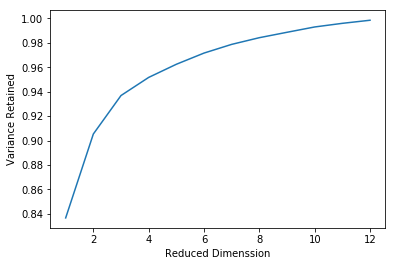

In [62]:
from matplotlib import pyplot as plt
plt.plot(values,var_retained)
plt.xlabel("Reduced Dimenssion")
plt.ylabel("Variance Retained")

In [106]:
#USING PYTHON LIBRARIRES
from sklearn.decomposition import PCA
var_retained =[]
for k in range(1,13):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(data2)
    var_retained.append(sum(pca.explained_variance_ratio_)*100)

Text(0, 0.5, 'Variance Retained(lib)')

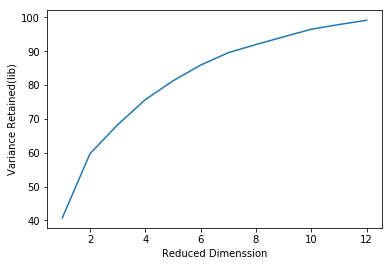

In [107]:
plt.plot(values,var_retained)
plt.xlabel("Reduced Dimenssion")
plt.ylabel("Variance Retained(lib)")

In [108]:
var_max= max(var_retained)
index_max_variance = var_retained.index(var_max)

In [112]:
index_max_variance

11